## Краткое вступление в работу  

В данной работе необходимо сделать предварительный анализ  для компании «Мегалайн» — федерального оператора сотовой связи, которая хочет ввести новые тарифы «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на выборке клиентов, размером в 500 пользователей компании.

Описание тарифов
- Тариф «Смарт»: 
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей
  Тариф «Ультра»: 
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей. 

Для того, чтобы провести анализ необходимо в данных вывиять ошибки и предработать их, так как наши данные могут быть искажены и в итоге, могут дать неправдивый прогноз: 

- Привести данные к нужным типам;
- Предработать данные, точнее выявить ошибки в виде пропусков, дубликатов, неверных данных.



  Так же необходимо будет посчитать для каждого пользователя: 
- Количество сделанных звонков и израсходованных минут разговора по месяцам;
- Количество отправленных сообщений по месяцам;
- Объем израсходованного интернет-трафика по месяцам;
- Помесячную выручку с каждого пользователя.

  Проанализировать данные и проверить гипотезы: 
  
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

  Описание данных:
  
  Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом 
- city — город проживания пользователя
- tariff — название тарифного плана
- Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
   
   Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
   Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

   Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета 
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Шаг 1. Открыть файл с данными и изучить общую информацию
## Шаг 2. Подготовить данные.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import math
calls_data = pd.read_csv('/datasets/calls.csv')

In [2]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Открыли таблицу со звонками. Четыре столбца , без пропусков. Но у столбца с датами звонков тип неопределен.

In [3]:
calls_data['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

В столбце 'duration' по длительности разговор видим нули, это проблема, от которой небходимо избавиться.Избавляемся следующим образом: Подставляем вместо нулей, цифру 1, так как оператор округляет всё в большую сторону.

Нули могли появиться из за технического сбоя, так как компания округляет длительность звонков в большую сторону, но округление могло произойти не в большую сторону, а в меньшую, в том случае когда звонок длится несколько секунд. 
(Следующая гипотеза под вопросом: Либо это не удавшиеся звонки, пользователь мог попросту не дозвониться, либо это сброшенные звонки. Так как обработка должна быть другой, по моему мнению: необходимо просто убрать нули.) 

In [4]:
calls_data.loc[calls_data['duration'] == 0.00 , 'duration'] =  1
calls_data['duration'].value_counts()

1.00     39701
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
28.49        1
26.16        1
25.76        1
27.26        1
27.63        1
Name: duration, Length: 2870, dtype: int64

In [5]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d %H:%M')
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


Столбец 'call_date' переводим в соответсвующий тип,  далее добавляем столбец по месяцам. 

In [6]:
internet_data = pd.read_csv('/datasets/internet.csv')
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Открываем таблицу с информацией об интернет-сессиях. Пропусков нет, но необходимо изменить тип данных в столбце session_date. 

In [7]:
internet_data.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [8]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d %H:%M')
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month

Меняем тип данных в столбце session_date на соответствующий и добавляем столбец с месяцами. 

In [9]:
internet_data['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

Много нулевых значений. Возьмем за основу гипотезу о том, что  здесь та же проблема с округлением.
Заполняем нули по тому же принципу как и в таблице по звонкам. 

(Но есть и другая гипотеза: Возможно пользователь не использует интернет во вовсе, если следовать этой гипотезе, то необходимо убрать нули, но я предпочла другой путь) 

In [10]:
internet_data.loc[internet_data['mb_used'] == 0.00 , 'duration'] =  1
internet_data['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

In [11]:
messages_data = pd.read_csv('/datasets/messages.csv')
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Считываем информацию таблицы, в которой отражена информация о сообщениях. Пропусков нет, но необходимо сменить тип данных в столбце message_date. 

In [12]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d %H:%M')
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month

In [13]:
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Считываем таблицу в которой содержится информация о тарифах.  

In [14]:
tariffs_data.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
users_data = pd.read_csv('/datasets/users.csv')
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Открываем талицу в которой содержится вся необходимая информация о пользователях. Видим пропуски  в столбце churn_date - дата прекращения пользования тарифом, логично предположить, что не так много пользователей прекратили пользоваться услугами компании. 

In [17]:
users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users_data['churn_date'].isnull().sum()

462

Это означает, что еще 462 пользователя пользуются услугами компании на текущий год) 

## Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений и объем израсходованного интернет-трафика по месяцам. 

In [19]:
calls = calls_data.groupby(['user_id', 'month'], as_index = False)['duration'].sum()
messages = messages_data.groupby(['user_id', 'month'], as_index = False)['id'].count()
internet = internet_data.groupby(['user_id', 'month'], as_index = False)['mb_used'].sum()
trafik = users_data[['user_id','tariff']].merge(calls, how = 'outer', on = 'user_id').merge(messages,how = 'outer', on = ['user_id', 'month']).merge(internet, how = 'outer', on = ['user_id', 'month'])
trafik

,user_id,tariff,month,duration,id,mb_used
0,1000,ultra,5.0,155.06,22.0,2253.49
1,1000,ultra,6.0,173.90,60.0,23233.77
2,1000,ultra,7.0,324.80,75.0,14003.64
3,1000,ultra,8.0,399.87,81.0,14055.93
4,1000,ultra,9.0,452.14,57.0,14568.91
...,...,...,...,...,...,...
3217,1489,NaN,9.0,NaN,32.0,17206.30
3218,1489,NaN,10.0,NaN,21.0,19559.44
3219,1489,NaN,11.0,NaN,20.0,17491.56
3220,1489,NaN,12.0,NaN,35.0,17322.51


Группируем данные, далее используем метод merge(), для того, чтобы получить немного другую структуру таблицы. 

## Шаг 2.(продолжение) Подсчет для каждого пользователя: 

Округлили в большую сторону неполные минуты 

In [20]:
calls_data_pivot = calls_data.pivot_table(index = 'user_id', columns = 'month',  values = ['id', 'duration'], aggfunc = {'id':'count', 'duration': 'sum'})
calls_data_pivot['duration'] = calls_data_pivot['duration'].apply(np.ceil)
calls_data_pivot

duration                                                          \
month         1      2      3      4      5      6      7      8      9    
user_id                                                                    
1000         NaN    NaN    NaN    NaN  156.0  174.0  325.0  400.0  453.0   
1001         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1002         NaN    NaN    NaN    NaN    NaN  112.0  210.0  275.0  207.0   
1003         NaN    NaN    NaN    NaN    NaN    NaN    NaN  368.0  934.0   
1004         NaN    NaN    NaN    NaN   35.0  166.0  127.0  130.0  119.0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495         NaN    NaN    NaN    NaN    NaN    NaN    NaN   92.0  784.0   
1496        47.0  574.0  534.0  510.0  473.0  547.0  561.0  524.0  468.0   
1497         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1498         NaN    NaN    NaN    NaN    NaN    NaN  170.0  391.0  453.0   
1499         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   66.0   

                ...    id                                                     \
month       10  ...    3     4     5     6     7     8      9      10     11   
user_id         ...                                                            
1000     342.0  ...   NaN   NaN  22.0  43.0  47.0  52.0   58.0   57.0   43.0   
1001       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   59.0   
1002     209.0  ...   NaN   NaN   NaN  15.0  26.0  42.0   36.0   33.0   32.0   
1003     821.0  ...   NaN   NaN   NaN   NaN   NaN  55.0  134.0  108.0  115.0   
1004     142.0  ...   NaN   NaN   9.0  31.0  22.0  19.0   26.0   29.0   19.0   
...        ...  ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
1495     998.0  ...   NaN   NaN   NaN   NaN   NaN  17.0  112.0  152.0  129.0   
1496     443.0  ...  79.0  67.0  63.0  74.0  73.0  88.0   68.0   72.0   80.0   
1497     480.0  ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   66.0   64.0   
1498     244.0  ...   NaN   NaN   NaN   NaN  23.0  57.0   59.0   41.0    NaN   
1499     454.0  ...   NaN   NaN   NaN   NaN   NaN   NaN    9.0   68.0   74.0   

                
month       12  
user_id         
1000      46.0  
1001      63.0  
1002      33.0  
1003     108.0  
1004      21.0  
...        ...  
1495     155.0  
1496      80.0  
1497      71.0  
1498       NaN  
1499      69.0  

[492 rows x 24 columns]

Построили сводную таблицу по необходимым параметрам. 

In [21]:
messages_data_pivot = messages_data.pivot_table(index = 'user_id', columns = 'month', values = 'id',  aggfunc ='count').fillna(0)
messages_data_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.0,17.0


Мегабайты были так же округлены в большую сторону. 

In [22]:
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil)
internet_data_pivot = internet_data.pivot_table(index ='user_id',columns = 'month', values ='mb_used',  aggfunc ='sum')
internet_data_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18452.0,14053.0
1002,NaN,NaN,NaN,NaN,NaN,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571.0,12479.0,14779.0,11368.0,10132.0
1004,NaN,NaN,NaN,NaN,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2616.0,33105.0,29393.0,38972.0,23450.0
1496,3766.0,28523.0,24990.0,21098.0,23740.0,20163.0,24395.0,23560.0,26970.0,28215.0,25092.0,20757.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11512.0,14174.0,19940.0


## 2.1 Помесячная выручка по сообщениям.

In [23]:
users_messages = users_data[['user_id', 'tariff', 'city']].merge(messages_data_pivot, on='user_id')
users_messages

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,smart,Стерлитамак,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,ultra,Москва,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
3,1004,ultra,Новокузнецк,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
4,1005,smart,Набережные Челны,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,ultra,Иркутск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,82.0,82.0,79.0,84.0
422,1496,smart,Вологда,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
423,1497,smart,Челябинск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,14.0,17.0
424,1498,smart,Владикавказ,0.0,0.0,0.0,0.0,0.0,0.0,20.0,62.0,44.0,42.0,0.0,0.0


Присоединили сводную таблицу по сообщениям по индексам  столбца 'user_id',таблицы users, для того, чтобы все пользователи вошли в таблицу,если даже они не пользовались данной услугой.  

In [24]:
def messages(row): 
    
    if row['tariff'] == 'smart': 
        for i in range(1, 13): 
            if row[i] > 50: 
                row[i] = (row[i] - 50) * 3 
            
            elif row[i] <= 50: 
                row[i] = 0
    if row['tariff'] == 'ultra':
        for i in range(1, 13):
            if row[i] > 1000: 
                row[i] = row[i] - 1000 
            elif row[i] <= 1000:
                row[i] = 0
    return row

users_messages_revenue = users_messages.apply(messages, axis = 1)

users_messages_revenue

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1002,smart,Стерлитамак,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,ultra,Москва,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1004,ultra,Новокузнецк,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005,smart,Набережные Челны,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,ultra,Иркутск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,1496,smart,Вологда,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
423,1497,smart,Челябинск,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,1498,smart,Владикавказ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0


Создана функция для подсчета помесячной переплаты по статье расходов для отдельного пользователя, без прибавления абонентской платы.  

In [25]:
calls_data_sum = calls_data.pivot_table(index = 'user_id', columns = 'month',  values =  'duration', aggfunc = 'sum')
calls_data_sum

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,155.06,173.90,324.80,399.87,452.14,341.45,325.04,320.98
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.12,407.34
1002,NaN,NaN,NaN,NaN,NaN,111.37,209.75,274.71,206.85,208.48,235.03,228.98
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.67,933.89,820.07,795.39,775.50
1004,NaN,NaN,NaN,NaN,34.29,165.14,126.42,129.01,118.57,141.61,113.72,129.45
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.03,783.62,997.33,909.65,1005.94
1496,46.76,573.41,533.95,509.29,472.74,546.21,560.06,523.78,467.39,442.65,647.22,498.91
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.26,362.09,528.33


##  Помесячная вырука по звонкам. 

In [26]:
users_calls = users_data[['user_id', 'tariff', 'city']].join(calls_data_sum, on='user_id')
users_calls

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,NaN,NaN,NaN,NaN,155.06,173.90,324.80,399.87,452.14,341.45,325.04,320.98
1,1001,smart,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.12,407.34
2,1002,smart,Стерлитамак,NaN,NaN,NaN,NaN,NaN,111.37,209.75,274.71,206.85,208.48,235.03,228.98
3,1003,ultra,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.67,933.89,820.07,795.39,775.50
4,1004,ultra,Новокузнецк,NaN,NaN,NaN,NaN,34.29,165.14,126.42,129.01,118.57,141.61,113.72,129.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.03,783.62,997.33,909.65,1005.94
496,1496,smart,Вологда,46.76,573.41,533.95,509.29,472.74,546.21,560.06,523.78,467.39,442.65,647.22,498.91
497,1497,smart,Челябинск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.26,362.09,528.33
498,1498,smart,Владикавказ,NaN,NaN,NaN,NaN,NaN,NaN,169.25,390.04,452.68,243.63,NaN,NaN


Присоединение таблиц происходило по той же логике, что и при присоединении в первом случае. 

In [27]:
def call(row): 
    
    if row['tariff'] == 'smart': 
        for i in range(1, 13): 
            if row[i] > 500: 
                row[i] = (row[i] - 500) * 3 + 550
            
            elif row[i] <= 500: 
                row[i] = 550
    if row['tariff'] == 'ultra':
        for i in range(1, 13):
            if row[i] > 3000: 
                row[i] = row[i] - 3000 + 1950
            elif row[i] <= 3000:
                row[i] = 1950
    return row

users_calls_revenue = users_calls.apply(call, axis = 1)
users_calls_revenue

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,NaN,NaN,NaN,NaN,1950.0,1950.00,1950.00,1950.00,1950.0,1950.0,1950.00,1950.00
1,1001,smart,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.00,550.00
2,1002,smart,Стерлитамак,NaN,NaN,NaN,NaN,NaN,550.00,550.00,550.00,550.0,550.0,550.00,550.00
3,1003,ultra,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.00,1950.0,1950.0,1950.00,1950.00
4,1004,ultra,Новокузнецк,NaN,NaN,NaN,NaN,1950.0,1950.00,1950.00,1950.00,1950.0,1950.0,1950.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.00,1950.0,1950.0,1950.00,1950.00
496,1496,smart,Вологда,550.0,770.23,651.85,577.87,550.0,688.63,730.18,621.34,550.0,550.0,991.66,550.00
497,1497,smart,Челябинск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,550.00,634.99
498,1498,smart,Владикавказ,NaN,NaN,NaN,NaN,NaN,NaN,550.00,550.00,550.0,550.0,NaN,NaN


Данная функция работает по той же логике, что и предыдущее функция, вычисляем помесячно переплату по статье расходов для отдельного пользователя, но еще и прибавляем ко всему этому абонентскую плату в зависимости от тарифа. 

## Помесячная вырука  интернет-трафик. 

In [28]:
users_internet = users_data[['user_id', 'tariff', 'city']].join(internet_data_pivot, on='user_id')
users_internet

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,NaN,NaN,NaN,NaN,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1,1001,smart,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18452.0,14053.0
2,1002,smart,Стерлитамак,NaN,NaN,NaN,NaN,NaN,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0
3,1003,ultra,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8571.0,12479.0,14779.0,11368.0,10132.0
4,1004,ultra,Новокузнецк,NaN,NaN,NaN,NaN,13415.0,17619.0,22243.0,28607.0,15125.0,18494.0,15631.0,18038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2616.0,33105.0,29393.0,38972.0,23450.0
496,1496,smart,Вологда,3766.0,28523.0,24990.0,21098.0,23740.0,20163.0,24395.0,23560.0,26970.0,28215.0,25092.0,20757.0
497,1497,smart,Челябинск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11512.0,14174.0,19940.0
498,1498,smart,Владикавказ,NaN,NaN,NaN,NaN,NaN,NaN,7486.0,24270.0,22166.0,20604.0,NaN,NaN


In [29]:
def internet(row): 
    
    if row['tariff'] == 'smart': 
        for i in range(1, 13): 
            if row[i] > 15360: 
                row[i] = (row[i] - 15360)*0.2
            
            elif row[i] <= 15360: 
                row[i] = 0
    if row['tariff'] == 'ultra':
        for i in range(1, 13):
            if row[i] > 30720: 
                row[i] = (row[i] - 30720)*0.15
            elif row[i] <= 30720:
                row[i] = 0
    return row

users_internet_revenue = users_internet.apply(internet, axis = 1)
users_internet_revenue

,user_id,tariff,city,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,Краснодар,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,1001,smart,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618.4,0.0
2,1002,smart,Стерлитамак,NaN,NaN,NaN,NaN,NaN,0.0,448.2,997.4,270.40,0.0,650.0,555.4
3,1003,ultra,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0,0.0,0.0
4,1004,ultra,Новокузнецк,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,357.75,0.0,1237.8,0.0
496,1496,smart,Вологда,0.0,2632.6,1926.0,1147.6,1676.0,960.6,1807.0,1640.0,2322.00,2571.0,1946.4,1079.4
497,1497,smart,Челябинск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,916.0
498,1498,smart,Владикавказ,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1782.0,1361.20,1048.8,NaN,NaN


In [30]:
all_data = pd.concat([users_internet_revenue,users_calls_revenue, users_messages_revenue], ignore_index = True)
all_data1 = all_data.groupby(['user_id', 'tariff', 'city']).sum()
all_data1

,,,1,2,3,4,5,6,7,8,9,10,11,12
user_id,tariff,city,,,,,,,,,,,,
1000,ultra,Краснодар,0.0,0.00,0.00,0.00,1950.0,1950.00,1950.00,1950.00,1950.00,1950.0,1950.00,1950.00
1001,smart,Москва,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,1168.40,550.00
1002,smart,Стерлитамак,0.0,0.00,0.00,0.00,0.0,550.00,998.20,1547.40,820.40,550.0,1200.00,1105.40
1003,ultra,Москва,0.0,0.00,0.00,0.00,0.0,0.00,0.00,1950.00,1950.00,1950.0,1950.00,1950.00
1004,ultra,Новокузнецк,0.0,0.00,0.00,0.00,1950.0,1950.00,1950.00,1950.00,1950.00,1950.0,1950.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,Иркутск,0.0,0.00,0.00,0.00,0.0,0.00,0.00,1950.00,2307.75,1950.0,3187.80,1950.00
1496,smart,Вологда,550.0,3402.83,2577.85,1725.47,2226.0,1649.23,2537.18,2261.34,2872.00,3121.0,2938.06,1632.40
1497,smart,Челябинск,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,550.0,550.00,1550.99


Посредством метода contact() соединили три полученные таблицы, а затем просуммировали по всем столбцам, чтобы получить общую сумму по всем пользователям.

In [31]:
all_data_moskva = all_data1.query('city == "Москва"')
all_data_moskva
all_data_region = all_data1.query('city != "Москва"')


## Шаг 3. Анализ данныx

In [32]:
smart_calls  = users_calls.query('tariff == "smart"')
ultra_calls = users_calls.query('tariff == "ultra"')
smart_sms = users_messages.query('tariff == "smart"')
ultra_sms = users_messages.query('tariff == "ultra"')
smart_internet = users_internet.query('tariff == "smart"')
ultra_internet = users_internet.query('tariff == "ultra"')

Сделали соответствующие срезы по тарифам для последующего анализа.

Нашли среднее по необходимым срезам. 

In [33]:
mean_calls_s = smart_calls.mean()
mean_calls_u = ultra_calls.mean()
mean_messagess_s = smart_sms.mean()
mean_messages_u =  ultra_sms.mean()
mean_internet_s  = smart_internet.mean()
mean_interne_u  = ultra_internet.mean()


Посчитали дисперсию по необходимым параметрам. 

In [34]:
var_s_calls = np.var(smart_calls,ddof=1)
var_u_calls = np.var(ultra_calls,ddof=1)
var_s_m = np.var(smart_sms,ddof=1)
var_u_m = np.var(ultra_sms,ddof=1)
var_s_i = np.var(smart_internet,ddof=1)
var_u_i = np.var(ultra_internet,ddof=1)

Посчитали стандартное отклонение. 

In [35]:
std_calls_s = np.std(smart_calls, ddof=1)
std_calls_u= np.std(ultra_calls, ddof=1)
std_messages_s = np.std(smart_sms, ddof=1)
std_messages_s =  np.std(ultra_sms, ddof=1)
std_internet_s = np.std(smart_internet, ddof=1)
std_internet_u = np.std(ultra_internet, ddof=1)

In [36]:
data_var = pd.DataFrame({"mean_calls_s" : mean_calls_s,
                         "mean_calls_u" : mean_calls_u,
                         "mean_messagess_s" : mean_messagess_s,
                         "mean_messages_u" : mean_messages_u,
                         "mean_internet_s"  : mean_internet_s,
                         "mean_internet_u"  : mean_interne_u, 
                           "var_s_calls" : var_s_calls,
                           "var_u_calls" : var_u_calls,
                           "var_s_m" : var_s_m,
                            "var_u_m" : var_u_m,
                           "var_s_i" : var_s_i,
                            "var_u_i" : var_u_i,
                         "std_calls_s" : std_calls_s,
                         "std_calls_u" : std_calls_u,
                         "std_messages_s" : std_messages_s,
                         "std_messages_s" : std_messages_s,
                         "std_internet_s" : std_internet_s,
                         "std_internet_u" : std_internet_u})
data_var

,mean_calls_s,mean_calls_u,mean_messagess_s,mean_messages_u,mean_internet_s,mean_internet_u,var_s_calls,var_u_calls,var_s_m,var_u_m,var_s_i,var_u_i,std_calls_s,std_calls_u,std_messages_s,std_internet_s,std_internet_u
user_id,1244.133903,1262.140940,1245.301325,1269.677419,1244.133903,1262.140940,21020.716304,20442.284056,21501.274350,20503.569892,2.102072e+04,2.044228e+04,144.985228,142.976516,143.190677,144.985228,142.976516
1,198.836471,417.555556,2.052980,2.451613,8524.441176,13153.555556,22791.231005,70139.959578,62.096852,138.607396,4.162621e+07,4.722641e+07,150.967649,264.839498,11.773164,6451.837940,6872.147046
2,290.584138,288.112500,4.625828,4.250000,11611.396552,12858.500000,34287.426786,83351.654411,179.909364,209.912602,3.911935e+07,1.098915e+08,185.168644,288.706866,14.488361,6254.546293,10482.912471
3,378.357662,475.792162,8.122517,9.637097,15123.857143,17551.972973,34564.821650,105070.382062,374.838760,727.192434,3.405260e+07,1.201640e+08,185.916168,324.145619,26.966506,5835.460138,10961.936316
4,356.088661,460.697925,11.400662,14.000000,13479.482143,16843.800000,32656.715397,62164.915513,443.277475,865.723577,3.254736e+07,9.462393e+07,180.711691,249.328930,29.423181,5705.029114,9727.483304
5,376.257305,519.523281,15.768212,20.451613,15825.198582,19674.848485,32619.383150,70586.578987,624.843106,1230.493575,3.582236e+07,9.680491e+07,180.608370,265.681349,35.078392,5985.177978,9838.948697
6,386.610429,482.903827,18.139073,28.266129,15814.768293,19170.457831,28040.666903,80768.513001,714.691558,1723.904209,3.361642e+07,8.314920e+07,167.453477,284.198017,41.519925,5797.966469,9118.618095
7,396.433881,547.818409,22.463576,36.580645,15763.512438,20742.588889,30335.060002,82219.182427,785.890695,2224.847102,3.486110e+07,9.783655e+07,174.169630,286.738875,47.168285,5904.328642,9891.235899
8,411.365684,514.981165,26.175497,41.798387,16703.252137,19778.915094,32123.395322,85509.939222,847.660128,2151.414306,3.030580e+07,1.073123e+08,179.230007,292.420826,46.383341,5505.070456,10359.164436
9,417.594595,542.172613,28.960265,48.491935,16324.526923,19390.824561,31048.575849,92173.427861,816.230974,2180.853593,2.706215e+07,8.764804e+07,176.206061,303.600771,46.699610,5202.129029,9362.053368


Для наглядности создана таблица 

## Строим гистограммы 

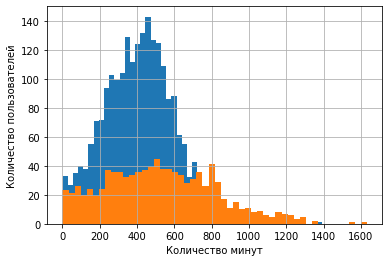

In [37]:
ax = trafik.query('tariff == "smart"')['duration'].hist(bins = 50)
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Количество минут')
trafik.query('tariff == "ultra"')['duration'].hist(bins = 50)

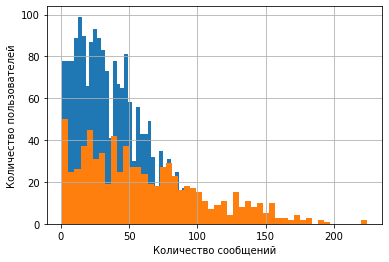

In [38]:
ax1 = trafik.query('tariff == "smart"')['id'].hist(bins = 50)
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('Количество сообщений')
trafik.query('tariff == "ultra"')['id'].hist(bins = 50)

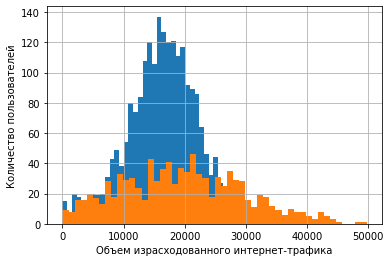

In [39]:
ax2 = trafik.query('tariff == "smart"')['mb_used'].hist(bins = 50)
ax2.set_ylabel('Количество пользователей')
ax2.set_xlabel('Объем израсходованного интернет-трафика')
trafik.query('tariff == "ultra"')['mb_used'].hist(bins = 50)

Построили гистрограммы по звонкам, по израсходованному объему интернета и сообщений по тарифам. 
Для сравнения построили на одном рисунке гистограммы для каждой услуги с разбиением по тарифу.

На первой гистограмме сравниваем количество использованных минут тарифов ультра и смарт, судя по гистрограмме в основном клиенты предпочитают пользоваться тарифом смарт, но всё таки большее количество израсходованных минут по тарифу ультра, скорее всего этого из за безлимита на звонки до 3000 минут.  Гистрограмма по тарифу смарт имеет распределение похожее на нормальное, а тариф смарт уступает по количеству, но тем не менее так же  похожа на нормальное распределение. 

На второй гистрограмме сравниваем количество количество отправленных сообщений по тарифам, видим, что так же преимущественно пользователи пользуются тарифом смарт, но большее количество сообщений отправляли по тарифу ультра, скорее всего этого из за безлимита на количество сообщений  до 1000 сообщений в месяц. Гистограмма по двум тарифам имеет отрицательную скошенность. 

На третьей гистограмме сравниваем количество объем израсходованного интернет-трафика по тарифам, аналогичная ситуация как и напредыдущих гистрограммах, количество пользователей больше по тарифу смарт, но ресурса больше потребляют по тарифу ультра,из за лимита входящего в тариф, до 30 гб. Распределение по тарифу смарт и ультра стремится к нормальному. 

## Вывод: 
Судя по гистрогаммам более востребованным тарифом является смарт, то есть больше клиентов, пользующихся данным тарифом, но больше ресурсов потребляют пользователи тарифа ультра. 

## Шаг 4. Проверка гипотез 


H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не  различается

H1: средняя выручка пользователей тарифов «Ультра» и «Смарт»  различается

 alpha задаем 0.05

In [40]:
all_data_ultra = all_data.query('tariff == "ultra"').dropna()
all_data_smart = all_data.query('tariff == "smart"').dropna()

In [41]:
print('Размер выборки по тарифу смарт :', len(all_data_smart))
print('Размер выборки по тарифу ультра :', len(all_data_ultra))

Размер выборки по тарифу смарт : 367
Размер выборки по тарифу ультра : 140


Берутся две выборки по тарифам смарт и ультра и хотелось по ним посмотреть, сравнить количество пользователей пользующихся тем или иным тарифом.  

In [42]:
rv1=scipy.stats.norm.rvs(all_data.query('tariff == "ultra"').dropna().iloc[:,:1])
rv2=scipy.stats.norm.rvs(all_data.query('tariff == "smart"').dropna().iloc[:,:1])
print(rv1, rv2)


[[1119.1449947 ]
 [1125.27496736]
 [1168.10852219]
 [1376.22680007]
 [1380.76056231]
 [1385.66548155]
 [1397.20598895]
 [1453.34451881]
 [1120.35585705]
 [1128.29974544]
 [1168.22445219]
 [1374.93507389]
 [1380.72862709]
 [1385.83020707]
 [1397.07879293]
 [1453.47143793]
 [ 998.37116408]
 [1003.05184529]
 [1003.89311126]
 [1012.30099659]
 [1016.18093955]
 [1018.27891986]
 [1017.63413681]
 [1022.2752617 ]
 [1029.48566953]
 [1038.39882951]
 [1047.17613979]
 [1048.28523056]
 [1057.25102704]
 [1060.7571574 ]
 [1080.58890097]
 [1080.87226544]
 [1082.84097424]
 [1088.58349111]
 [1090.46768002]
 [1090.86714641]
 [1095.34527645]
 [1095.95652541]
 [1097.0553461 ]
 [1100.38476993]
 [1103.48304779]
 [1106.21747305]
 [1121.24402482]
 [1121.30266474]
 [1124.26427376]
 [1148.57549847]
 [1150.07128146]
 [1148.9880912 ]
 [1154.18946581]
 [1166.00627086]
 [1165.5914562 ]
 [1168.36399807]
 [1167.58052793]
 [1179.56281384]
 [1182.92834877]
 [1192.56156069]
 [1195.95328069]
 [1201.41448783]
 [1203.4165019

In [43]:
scipy.stats.ttest_ind(rv1, rv2, equal_var = False)

Ttest_indResult(statistic=array([1.63810934]), pvalue=array([0.10262165]))

Вывод: pvalue слишком большое, чтобы делать выводы о различии средней выручки тарифов смарт и ультра. Так же отмечу, что размер выборок распределен неравномерно.

H0: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

alpha задаем 0.05

In [44]:
print('Размер выборки по городу Москва :', len(all_data_moskva))
print('Размер выборки по регионам  :', len(all_data_region))

Размер выборки по городу Москва : 99
Размер выборки по регионам  : 401


Берутся две выборки по городу Москва и регионам. Хотелось  по ним посмотреть, сравнить количество пользователей из того или иного города.  

In [45]:
rv3=scipy.stats.norm.rvs(all_data_moskva.iloc[:,:1])
rv4=scipy.stats.norm.rvs(all_data_region.iloc[:,:1])
print(rv3, rv4)

[[ 5.06201712e-01]
 [ 1.05455248e+00]
 [-1.08115155e-01]
 [-1.53626618e+00]
 [-9.96266075e-01]
 [-1.84018068e+00]
 [-1.01708312e+00]
 [-3.86750680e-01]
 [-6.06107112e-02]
 [-1.05556401e+00]
 [ 2.02153219e+00]
 [ 5.00738708e-01]
 [-2.04120077e+00]
 [-9.58088689e-01]
 [-3.60960848e-01]
 [ 8.38721729e-01]
 [-1.31341447e+00]
 [-1.42461055e-01]
 [ 1.95703441e+00]
 [ 5.72407846e-01]
 [-9.55292600e-01]
 [-2.89301355e-01]
 [ 6.14992661e-01]
 [ 1.48329175e+00]
 [ 2.93186078e-01]
 [-6.27717161e-02]
 [-5.48423447e-01]
 [ 3.52632589e-01]
 [ 5.73142328e-01]
 [-3.45899155e-01]
 [-1.48617697e+00]
 [ 9.45264287e-01]
 [ 5.58372592e-01]
 [-1.81332495e+00]
 [-2.76787436e+00]
 [ 9.39663744e-02]
 [ 6.49204153e+02]
 [ 8.67386857e-01]
 [-1.11513050e+00]
 [ 5.75779941e-01]
 [ 5.94384199e-01]
 [-1.13214742e+00]
 [-1.27519205e+00]
 [-1.72421237e+00]
 [ 1.74389327e-01]
 [-1.59265407e+00]
 [-4.42488207e-01]
 [ 1.95011426e+03]
 [-6.73738558e-02]
 [ 1.58007150e+00]
 [ 9.71888838e-01]
 [-5.87058156e-01]
 [ 1.0566865

In [46]:
scipy.stats.ttest_ind(rv3, rv4, equal_var = False)

Ttest_indResult(statistic=array([0.9237505]), pvalue=array([0.35747721]))

Вывод: pvalue равно 35%, а это значит что мы не отвергаем гипотезу H0.
Но хотелось бы отметить, что размер выборок распределен неравномерно.

## Шаг 5. Вывод. 

В данном проекте был проведен анализ двух тарифов. И необходимо ответить на вопрос какой тариф приносит больше денег. 
Для того, чтобы ответить на данный вопрос необходимо было проделать следующие шаги: 

- Предработать данные.
- Подсчитать помессячную выручку для каждого пользователя. 
- Проанализировать поведение клиентов: сколько ресурса по каждому пункиту он потребляет в месяц. Для этого мы подсчитали среднее, дисперсию, стандартное отклонение. 

Построены гистрограммы: 

Построили гистрограммы по звонкам, по израсходованному объему интернета и сообщений по тарифам. 
Для сравнения построили на одном рисунке гистограммы для каждой услуги с разбиением по тарифу.

На первой гистограмме сравниваем количество использованных минут тарифов ультра и смарт, судя по гистрограмме в основном клиенты предпочитают пользоваться тарифом смарт, но всё таки большее количество израсходованных минут по тарифу ультра, скорее всего этого из за безлимита на звонки до 3000 минут.  Гистрограмма по тарифу смарт имеет распределение похожее на нормальное, а тариф смарт уступает по количеству, но тем не менее так же  похожа на нормальное распределение. 

На второй гистрограмме сравниваем количество количество отправленных сообщений по тарифам, видим, что так же преимущественно пользователи пользуются тарифом смарт, но большее количество сообщений отправляли по тарифу ультра, скорее всего этого из за безлимита на количество сообщений  до 1000 сообщений в месяц. Гистограмма по двум тарифам имеет отрицательную скошенность. 

На третьей гистограмме сравниваем количество объем израсходованного интернет-трафика по тарифам, аналогичная ситуация как и напредыдущих гистрограммах, количество пользователей больше по тарифу смарт, но ресурса больше потребляют по тарифу ультра,из за лимита входящего в тариф, до 30 гб. Распределение по тарифу смарт и ультра стремится к нормальному. 

## Вывод: 
Судя по гистрогаммам более востребованным тарифом является смарт, то есть больше клиентов, пользующихся данным тарифом, но больше ресурсов потребляют пользователи тарифа ультра. 


Проверили две гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается: исходя из результатов, к сожалению, ничего конкретного сказать не удается.

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов: pvalue равно 35%, а это значит что мы не отвергаем гипотезу H0.  Но хотелось бы отметить, что размер выборок распределен неравномерно.
  
 
 Исходя из одной выборки в 500 пользователей, мы не можем сделать 100% вывод.Но можем выдвинуть предположение, что более востребованным тарифом является тариф смарт исходя из наших исследований. 
 
 
